# This dataset is from Kaggle, it has data about houses to rent in Brazil

# Este dataset é retirado do Kaggle, contém dados sobre casas para alugar no Brasil

In [99]:
#Data: https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent?select=houses_to_rent_v2.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
%matplotlib inline

In [2]:
df = pd.read_csv('houses_to_rent_v2.csv')

In [3]:
# Show top 5 rows of data
# Mostrar as 5 primeiras linhas
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [5]:
df.describe()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


# Here we notice some that we have some extreme values, especially in area, hoa, property tax, and total. #
Podemos observer que temos alguns valores extremos, especialmente nas colunas area, hoa, property tax e total.

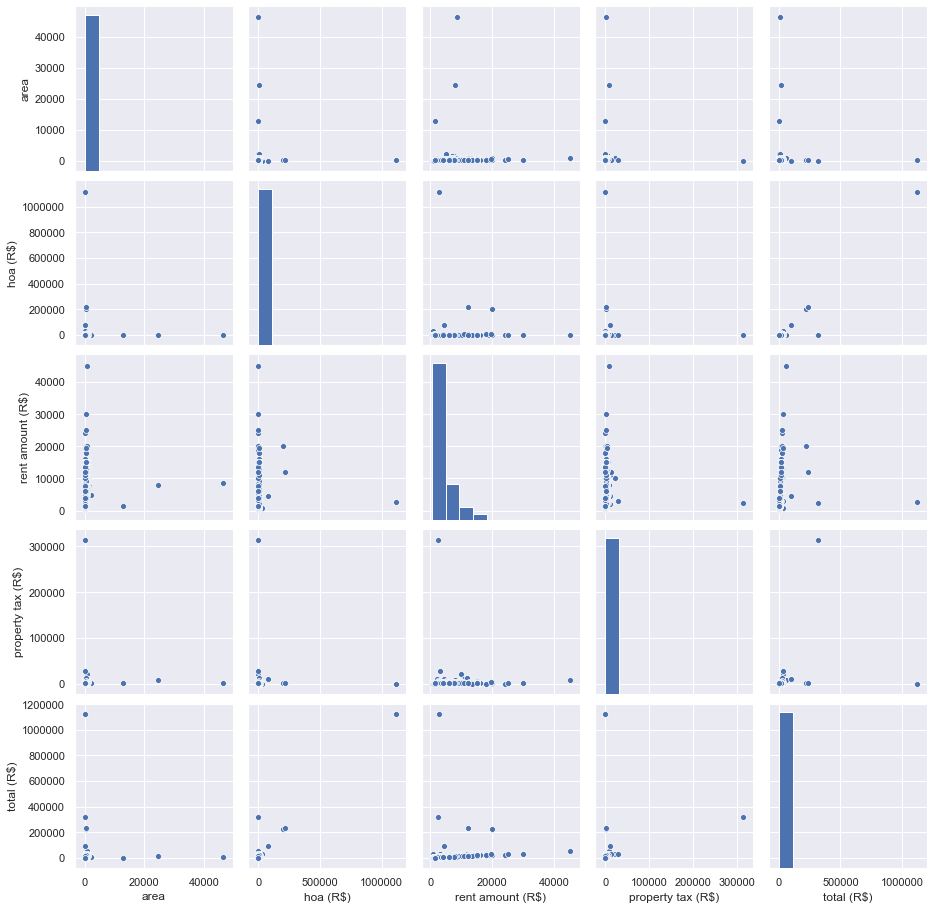

In [6]:
sns.pairplot(df[['area','hoa (R$)','rent amount (R$)','property tax (R$)','total (R$)']])

By looking at the graphs, we can see some outliers, so let's investigate one by one.

Observando os gráficos, podemos ver alguns outliers, vamos investigar.

### Area column ###

In [7]:
# Let's start with the top 10 area rows
# Começamos pelo top 10 da coluna area
df['area'].nlargest(10)

2397    46335
5915    24606
9241    12732
5129     2000
8790     2000
654      1600
4813     1600
3559     1100
2423     1020
640      1000
Name: area, dtype: int64

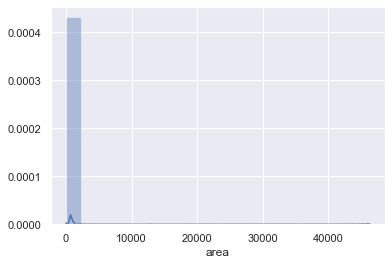

In [8]:
sns.distplot(df['area'],bins =20)

The top 3 values are at least 6 times higher than the rest of the dataset.
A new dataset without these values will be created.

Os 3 primeiros valores são pelo menos 6 vezes maior que o resto dos dados.
Um novo dataset será criado sem esses valores.

In [9]:
df_updated = df[df['area']<3000]
df_updated['area'].nlargest(10)

5129    2000
8790    2000
654     1600
4813    1600
3559    1100
2423    1020
640     1000
1250    1000
3052    1000
6615    1000
Name: area, dtype: int64

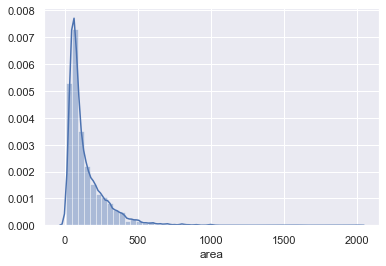

In [11]:
sns.distplot(df_updated['area'])
#It looks much better now
#Parece muito melhor agora

### HOA (Home Owners Association) Column ###
### Condominio ###

In [12]:
# Now, we do the same with the HOA values
# Agora, faremos o mesmo com HOA (Condomínio)
df_updated['hoa (R$)'].nlargest(10)

255     1117000
6979    1117000
6230     220000
2859     200000
2928      81150
1444      32000
1213      15000
415       14130
5293      14000
974       10000
Name: hoa (R$), dtype: int64

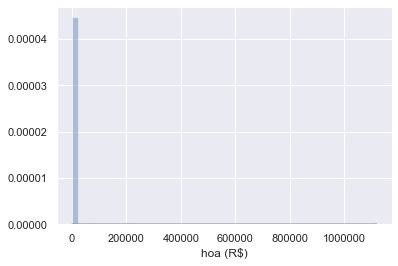

In [13]:
sns.distplot(df_updated['hoa (R$)'])

The first 5,6 values are a little higher than the usual, there might be something wrong with the data, let's investigate them.

Os 5,6 primeiros valores estão um pouco maiores que o resto, provavelmente tem algo errado, vamos investigar.

In [14]:
df_updated[df_updated['hoa (R$)']>9000].sort_values(by=['hoa (R$)'],ascending = False)

# We will delete the first 6 rows as they do not seem to be correct.

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
255,Belo Horizonte,155,1,4,0,4,not acept,not furnished,1117000,2790,64,38,1120000
6979,Belo Horizonte,155,1,4,0,4,not acept,not furnished,1117000,2790,64,38,1120000
6230,São Paulo,340,5,4,2,7,acept,not furnished,220000,12000,1000,153,233200
2859,São Paulo,285,4,5,4,6,acept,furnished,200000,20000,1834,254,222100
2928,Rio de Janeiro,35,1,1,0,1,acept,furnished,81150,4500,9900,58,95610
1444,Porto Alegre,42,1,1,0,10,acept,not furnished,32000,700,40,11,32750
1213,São Paulo,850,6,7,4,-,not acept,not furnished,15000,13000,2465,196,30660
415,São Paulo,488,4,3,3,-,acept,not furnished,14130,6400,1214,82,21820
5293,São Paulo,850,5,7,8,1,not acept,not furnished,14000,4000,0,51,18050
974,São Paulo,600,6,7,4,-,acept,furnished,10000,15000,84,226,25310


In [15]:
# We will delete the first 6 rows
# Deletaremos as 6 primeiras linhas
df_updated=df_updated[df_updated['hoa (R$)']<30000]
df_updated['hoa (R$)'].nlargest(10)

1213    15000
415     14130
5293    14000
974     10000
8858    10000
547      9900
7020     9500
7679     9000
1862     8600
1072     8500
Name: hoa (R$), dtype: int64

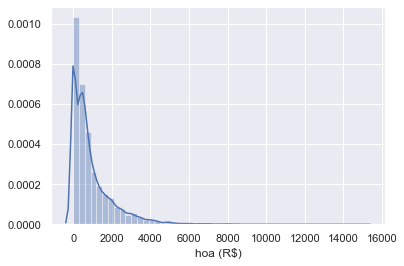

In [16]:
sns.distplot(df_updated['hoa (R$)'])

### Rent Amount Column ###
### Aluguel ###

In [17]:
df_updated['rent amount (R$)'].nlargest(10)

2182    45000
7748    30000
6947    25000
2619    24000
157     20000
1253    20000
1743    20000
5525    20000
6185    19500
2521    19000
Name: rent amount (R$), dtype: int64

In [18]:
df_updated[df_updated['rent amount (R$)']>19500].sort_values(by='rent amount (R$)',ascending =False)

#This column seem to be normal, so no changes will be made
#Essa coluna parece está normal, não faremos mudanças

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
2182,São Paulo,700,4,7,8,-,acept,not furnished,0,45000,8750,677,54430
7748,São Paulo,350,3,3,3,-,acept,not furnished,0,30000,560,451,31010
6947,São Paulo,486,8,4,6,-,acept,not furnished,0,25000,2200,376,27580
2619,São Paulo,80,2,1,1,1,acept,not furnished,875,24000,0,305,25180
157,São Paulo,660,4,5,5,12,acept,furnished,4800,20000,1750,254,26800
1253,São Paulo,315,3,5,2,14,not acept,not furnished,4300,20000,959,254,25510
1743,São Paulo,410,4,5,5,1,acept,not furnished,0,20000,0,254,20250
5525,São Paulo,900,3,4,8,-,acept,not furnished,0,20000,3813,301,24110


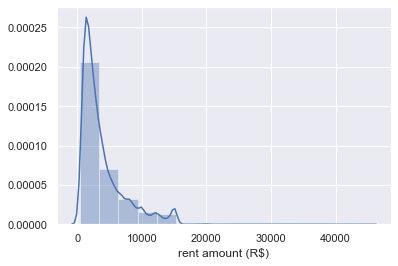

In [19]:
sns.distplot(df_updated['rent amount (R$)'],bins =15)

### Property Tax ###
### IPTU ###

In [20]:
df_updated['property tax (R$)'].nlargest(10)
# The first 3 rows seem to be a little more than the rest.
# As 3 primeiras linhas estão um pouco acima do resto.

6645     313700
6243      28120
1699      21880
10172     12500
5331      10830
19         9500
7674       9500
2182       8750
8187       8750
7679       5917
Name: property tax (R$), dtype: int64

In [21]:
df_updated[df_updated['property tax (R$)']>8000].sort_values(by='property tax (R$)',ascending =False)

#Even though the first 3 rows seem to be higher than the rest, the 3rd value makes sense as the area is 700
#However the first two values do not, because the area is extremely small. We will drop them

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
6645,São Paulo,42,1,2,1,6,not acept,not furnished,690,2500,313700,32,316900
6243,Rio de Janeiro,95,2,2,1,11,acept,not furnished,1024,3000,28120,39,32180
1699,São Paulo,700,4,4,4,-,acept,not furnished,0,10000,21880,151,32040
10172,Belo Horizonte,260,4,4,6,10,acept,furnished,3200,11900,12500,159,27760
5331,São Paulo,300,4,5,5,6,not acept,not furnished,3500,1990,10830,26,16350
19,São Paulo,600,4,5,6,-,acept,not furnished,0,12000,9500,181,21680
7674,São Paulo,890,5,6,8,-,not acept,not furnished,0,11000,9500,166,20670
2182,São Paulo,700,4,7,8,-,acept,not furnished,0,45000,8750,677,54430
8187,São Paulo,700,4,10,0,-,acept,not furnished,0,15000,8750,226,23980


In [22]:
df_updated = df_updated[df_updated['property tax (R$)']<25000]

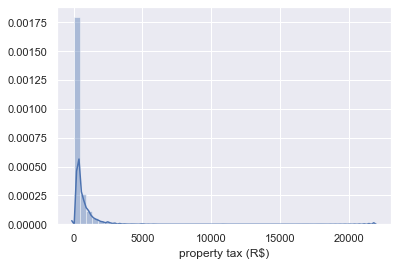

In [23]:
sns.distplot(df_updated['property tax (R$)'])

### Total Amount ###
### Total ###

In [24]:
df_updated['total (R$)'].nlargest(10)

2182    54430
1699    32040
6185    31580
7748    31010
1213    30660
1862    28790
254     28490
9595    28310
722     27840
7679    27830
Name: total (R$), dtype: int64

In [25]:
df_updated[df_updated['total (R$)']>20000].sort_values(by='total (R$)',ascending = False)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
2182,São Paulo,700,4,7,8,-,acept,not furnished,0,45000,8750,677,54430
1699,São Paulo,700,4,4,4,-,acept,not furnished,0,10000,21880,151,32040
6185,São Paulo,455,4,5,4,5,acept,not furnished,8500,19500,3334,248,31580
7748,São Paulo,350,3,3,3,-,acept,not furnished,0,30000,560,451,31010
1213,São Paulo,850,6,7,4,-,not acept,not furnished,15000,13000,2465,196,30660
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1549,São Paulo,420,4,4,4,7,acept,not furnished,6000,12000,2000,153,20150
1758,São Paulo,260,4,4,3,11,not acept,not furnished,3500,15000,1417,191,20110
1580,Belo Horizonte,312,4,5,4,15,acept,not furnished,3150,15000,1747,200,20100
5884,São Paulo,260,4,4,4,4,acept,not furnished,3247,15000,1589,191,20030


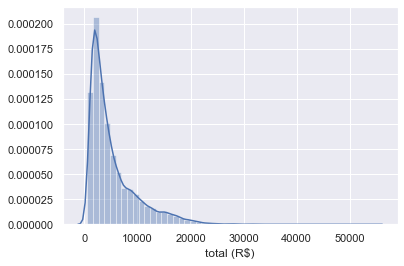

In [26]:
sns.distplot(df_updated['total (R$)'])

### Now that the data seems to be cleaned up, we can do some analysis ###

In [27]:
df_updated.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [28]:
df_updated.describe()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000
mean,141.430203,2.506039,2.235652,1.609213,915.631682,3894.035671,333.066192,53.275162,5196.197922
std,134.365895,1.170720,1.406042,1.589256,1127.736736,3405.011398,623.376247,47.733458,4481.861224
min,11.000000,1.000000,1.000000,0.000000,0.000000,450.000000,0.000000,3.000000,499.000000
25%,56.000000,2.000000,1.000000,0.000000,170.000000,1530.000000,38.000000,21.000000,2060.000000
50%,90.000000,2.000000,2.000000,1.000000,557.000000,2650.000000,125.000000,36.000000,3577.000000
75%,182.000000,3.000000,3.000000,2.000000,1233.000000,5000.000000,375.000000,68.000000,6754.000000
max,2000.000000,13.000000,10.000000,12.000000,15000.000000,45000.000000,21880.000000,677.000000,54430.000000


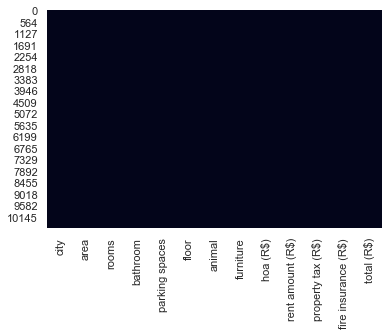

In [29]:
# Checking if there is missing data
# Checando para ver se temos dados faltando
sns.heatmap(df_updated.isnull(),cbar=False) 

In [30]:
# Amount of houses by city
# Quantidade de casa por cidade
df_updated['city'].value_counts()

São Paulo         5883
Rio de Janeiro    1499
Belo Horizonte    1255
Porto Alegre      1192
Campinas           852
Name: city, dtype: int64

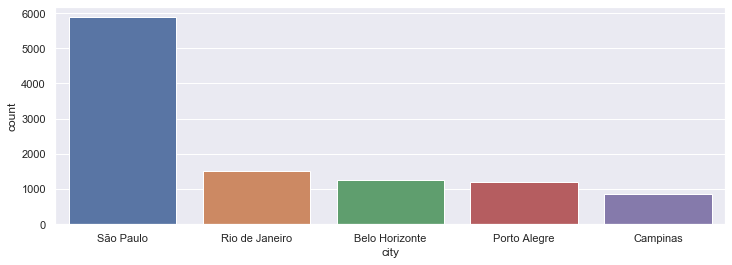

In [31]:
plt.figure(figsize=(12,4))
sns.countplot(x='city',data=df,order = df['city'].value_counts().index)

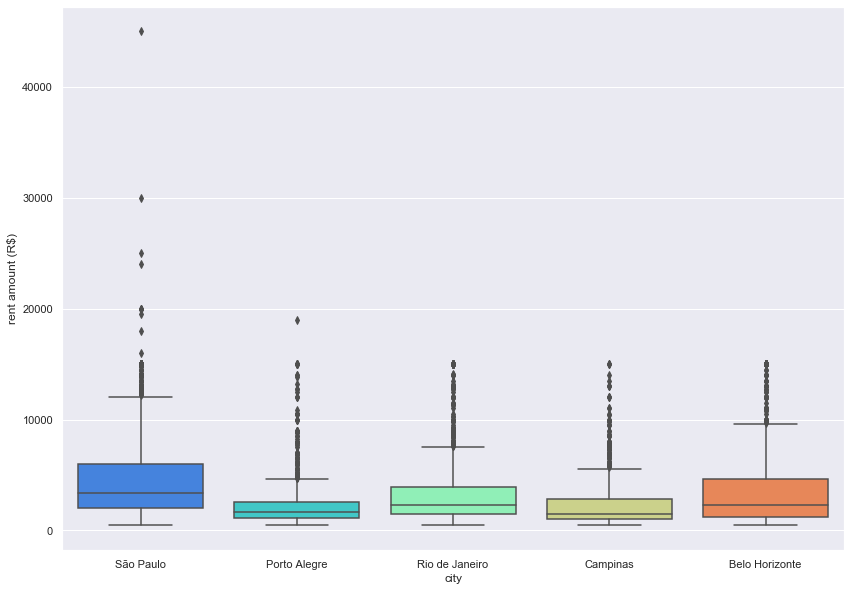

In [33]:
# Boxplot for rent amount by city
# Boxplot para preço de aluguel por cidade
plt.figure(figsize=(14,10))
g = sns.boxplot(x="city", y="rent amount (R$)", data=df_updated,palette='rainbow')
# Notice that there is an outlier that has rent amount of above R$ 40,000.00 and one with rent around R$ 30,000.00
# Observe que há um outlier com preço de aluguel acima de R$ 40,000.00 e um de R$ 30,000.00

In [34]:
# Details of the outlier mentioned
# Detalhes do outlier mencionado
df_updated.loc[df_updated[df_updated['city']=='São Paulo']['rent amount (R$)'].idxmax()]

city                       São Paulo
area                             700
rooms                              4
bathroom                           7
parking spaces                     8
floor                              -
animal                         acept
furniture              not furnished
hoa (R$)                           0
rent amount (R$)               45000
property tax (R$)               8750
fire insurance (R$)              677
total (R$)                     54430
Name: 2182, dtype: object

In [35]:
# Details of the second placed outlier 
# Detalhes do segundo outlier
df_updated.loc[df_updated[df_updated['city']=='São Paulo']['rent amount (R$)'].nlargest(2).idxmin()]

city                       São Paulo
area                             350
rooms                              3
bathroom                           3
parking spaces                     3
floor                              -
animal                         acept
furniture              not furnished
hoa (R$)                           0
rent amount (R$)               30000
property tax (R$)                560
fire insurance (R$)              451
total (R$)                     31010
Name: 7748, dtype: object

In [36]:
# Average Total Rent amount by City
# Média de aluguel por cidade
avg_rent_by_city = df_updated.groupby('city')['rent amount (R$)'].mean().round(2).sort_values(ascending =False)
avg_rent_by_city

city
São Paulo         4648.72
Belo Horizonte    3661.67
Rio de Janeiro    3232.21
Campinas          2365.19
Porto Alegre      2339.07
Name: rent amount (R$), dtype: float64

In [37]:
# Average Total Price by City
# Média de preco por cidade
avg_total_by_city = df_updated.groupby('city')['total (R$)'].mean().round(2).sort_values(ascending =False)
avg_total_by_city

city
São Paulo         6250.80
Belo Horizonte    4537.33
Rio de Janeiro    4532.59
Campinas          3174.16
Porto Alegre      2964.82
Name: total (R$), dtype: float64

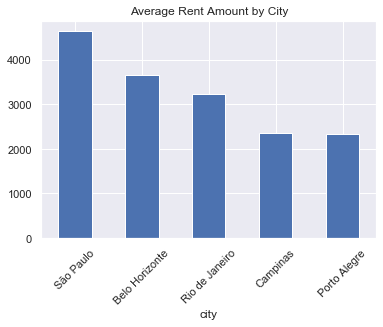

In [38]:
avg_rent_by_city.plot(kind='bar',title ='Average Rent Amount by City',rot =45)

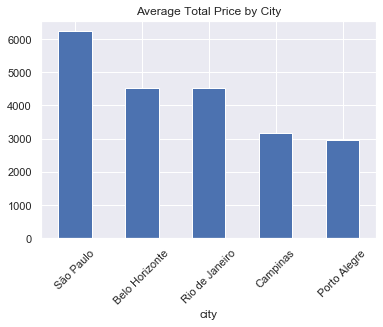

In [39]:
avg_total_by_city.plot(kind='bar',title ='Average Total Price by City',rot =45)

In [40]:
df_updated.groupby('city')[['hoa (R$)','rent amount (R$)','property tax (R$)','fire insurance (R$)','total (R$)']].mean()

,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
city,,,,,
Belo Horizonte,548.908367,3661.667729,272.817530,53.652590,4537.334661
Campinas,628.839202,2365.187793,147.718310,32.401408,3174.164319
Porto Alegre,465.185403,2339.073826,124.092282,36.447148,2964.816275
Rio de Janeiro,1026.053369,3232.214143,231.832555,42.474983,4532.587725
São Paulo,1098.530682,4648.716131,440.898011,62.379228,6250.796702


São Paulo is the city with the highest price to rent a house, with Belo Horizonte coming in second and Rio de Janeiro in third. Note that the average hoa (R$) for Rio de Janeiro is way higher than Belo Horizonte (almost double).

São Paulo é a cidade com o maior preço para alugar uma casa, com Belo Horizonte em segundo e Rio de Janeiro em terceiro.
Observe que em média o hoa no Rio de Janeiro é muito maior que em Belo Horizonte (quase o dobro).

### From now on, we will try to use the total column to analyse our data ###
De agora em diante, usaremos a coluna total para analisar nossos dados

In [41]:
df_updated_1 = df_updated.drop(['hoa (R$)', 'rent amount (R$)', 'property tax (R$)', 'fire insurance (R$)'],axis =1)

In [42]:
df_updated_1.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,836


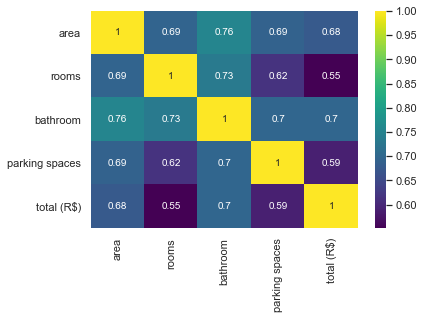

In [44]:
sns.heatmap(df_updated_1.corr(),annot =True,cmap='viridis')
# The correlation between bathroom and total (R$) is the highest we can observe
# A correlação entre bathroom e total (R$) é a maior que podemos observar

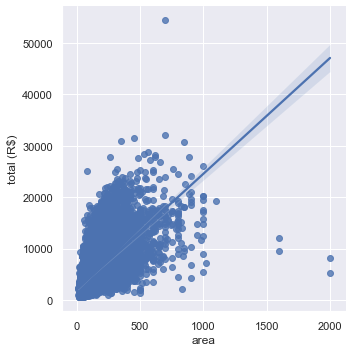

In [45]:
sns.lmplot(x='area',y='total (R$)',data = df_updated_1)

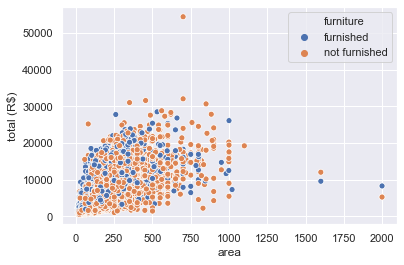

In [46]:
sns.scatterplot(x='area',y='total (R$)',hue='furniture',data=df_updated_1)

In [47]:
df_updated_1['furniture'].value_counts()

not furnished    8078
furnished        2603
Name: furniture, dtype: int64

In [48]:
df_updated_1.groupby('furniture')['total (R$)'].mean()
# A furnished house to rent is in average R$ 1683 more expensive than a not furnished house

furniture
furnished        6469.117557
not furnished    4786.020921
Name: total (R$), dtype: float64

In [49]:
df_updated_1['animal'].value_counts()

acept        8308
not acept    2373
Name: animal, dtype: int64

In [50]:
df_updated_1.groupby('animal')['total (R$)'].mean()
# A house that accepts animals is in average R$ 714 more expensive than a house that does not

animal
acept        5354.925494
not acept    4640.484197
Name: total (R$), dtype: float64

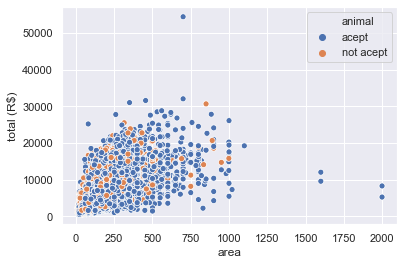

In [51]:
sns.scatterplot(x='area',y='total (R$)',hue='animal',data=df_updated_1)

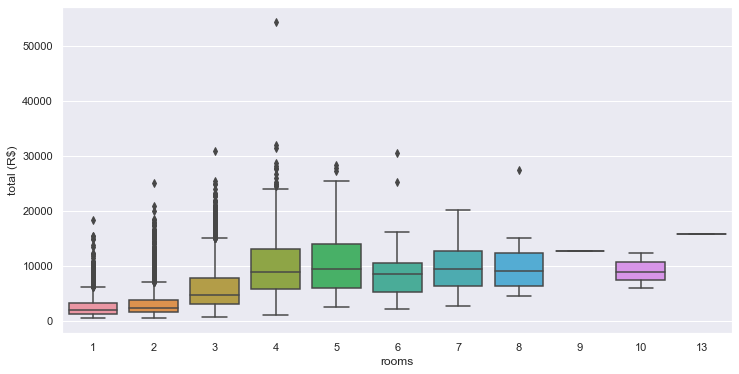

In [52]:
plt.figure(figsize=(12,6))
sns.boxplot(x='rooms',y='total (R$)',data=df_updated_1)

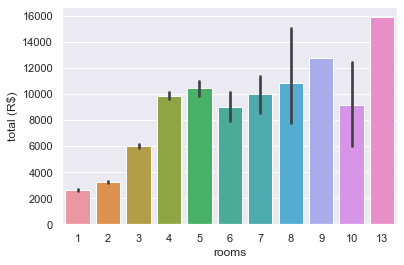

In [53]:
sns.barplot(x='rooms',y='total (R$)',data=df_updated_1)

In [54]:
df_updated_1.groupby('rooms')['total (R$)'].describe()

,count,mean,std,min,25%,50%,75%,max
rooms,,,,,,,,
1,2449.0,2618.738669,1890.349956,499.0,1349.00,2110.0,3287.0,18500.0
2,2974.0,3244.491594,2559.926084,550.0,1729.25,2386.5,3862.5,25180.0
3,3268.0,6011.758874,4132.583471,741.0,3043.50,4682.5,7884.5,31010.0
4,1584.0,9883.607955,5323.346121,1196.0,5784.50,8867.0,13137.5,54430.0
5,286.0,10454.332168,5297.513681,2508.0,6081.75,9579.0,13997.5,28490.0
6,68.0,8996.088235,4982.510159,2176.0,5315.75,8528.5,10540.0,30660.0
7,36.0,9966.638889,4424.066049,2767.0,6487.50,9467.5,12817.5,20230.0
8,11.0,10857.272727,6504.786793,4566.0,6487.50,9121.0,12465.0,27580.0
9,1.0,12780.000000,NaN,12780.0,12780.00,12780.0,12780.0,12780.0


We can see a growth of average price in the first 4 values for rooms, after that, it tends to go up and down

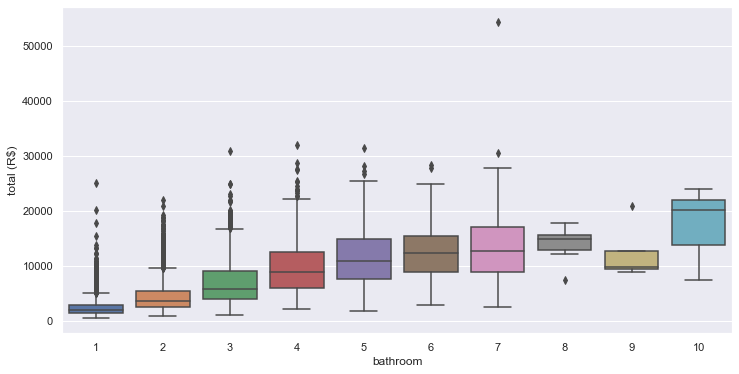

In [55]:
plt.figure(figsize=(12,6))
sns.boxplot(x='bathroom',y='total (R$)',data=df_updated_1)

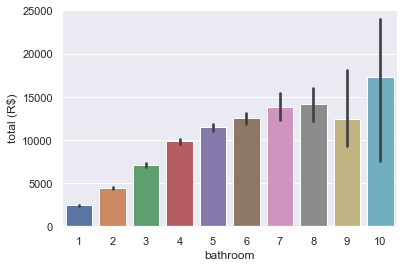

In [56]:
sns.barplot(x='bathroom',y='total (R$)',data=df_updated_1)

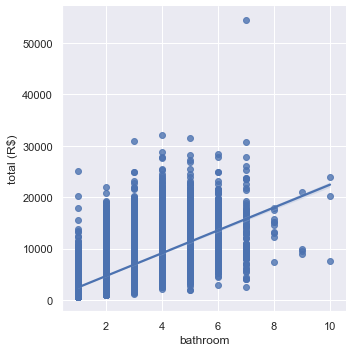

In [57]:
sns.lmplot(x='bathroom',y='total (R$)',data=df_updated_1)

On the other hand, the average price goes up with each bathroom added, except when we reach 9 bathrooms. With the regression line, we can prove that.

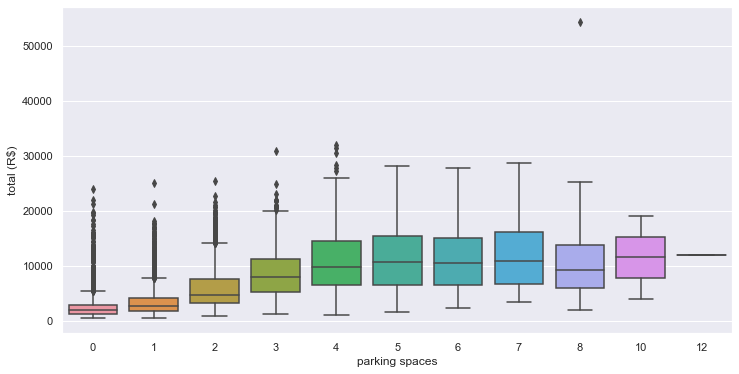

In [58]:
plt.figure(figsize=(12,6))
sns.boxplot(x='parking spaces',y='total (R$)',data=df_updated_1)

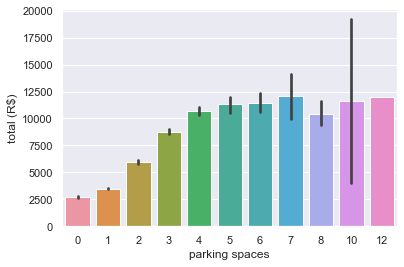

In [59]:
sns.barplot(x='parking spaces',y='total (R$)',data=df_updated_1)

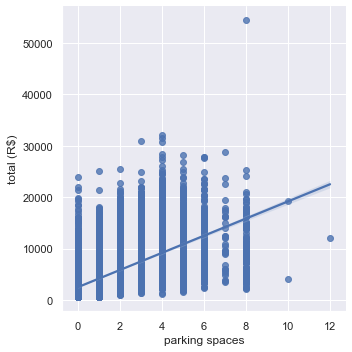

In [60]:
sns.lmplot(x='parking spaces',y='total (R$)',data=df_updated_1)

The same that happened to with the rooms column, happened to parking spaces, but the regression line also shows that the higher the amount of parking places the higher the price.

In [61]:
df_updated_1.groupby('city')['total (R$)'].mean()

city
Belo Horizonte    4537.334661
Campinas          3174.164319
Porto Alegre      2964.816275
Rio de Janeiro    4532.587725
São Paulo         6250.796702
Name: total (R$), dtype: float64

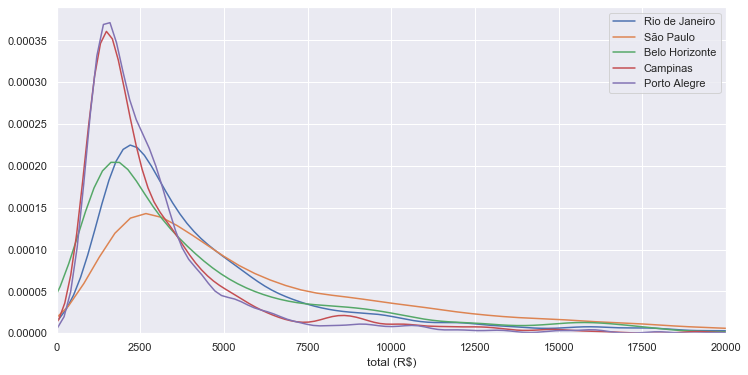

In [97]:
plt.figure(figsize=(12,6))
plt.xlim(0,20000)
sns.distplot(df_updated_1.loc[df_updated_1['city']=='Rio de Janeiro']['total (R$)'], label='Rio de Janeiro', hist= False)
sns.distplot(df_updated_1.loc[df_updated_1['city']=='São Paulo']['total (R$)'], label ='São Paulo', hist=False)
sns.distplot(df_updated_1.loc[df_updated_1['city']=='Belo Horizonte']['total (R$)'], label ='Belo Horizonte', hist= False)
sns.distplot(df_updated_1.loc[df_updated_1['city']=='Campinas']['total (R$)'],label='Campinas', hist =False)
sns.distplot(df_updated_1.loc[df_updated_1['city']=='Porto Alegre']['total (R$)'],label='Porto Alegre', hist =False)
plt.legend()

This dataset was useful to train on some pandas and data visualization skills, however there is not much to conclude from it.

Este dataset foi útil para praticar pandas e visualização de dados, porém não há muito para concluir.